# Evolution of the SO carbon sink under 6 scenarios, 1948-2100

- These scenarios aren't spun up - they are started from Dave Willis's ERA5 run, year 1948. 
- use met office forcing
- GOC brakes are ON (sanity check for all 6 runs look normal)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import matplotlib.pyplot as plt
import glob
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc
import breakdown as bp
import plotr as pr
from importlib import reload
reload(bp)
import warnings
import numpy as np
warnings.filterwarnings('ignore')

note: seasonal extracted carbon flux code and intermediate producsts are in EXTRACT/cflx_seasonal.py

First, let's open the standard carbon monitor and plot the evolution of whole-domain pCO2 and CO2 flux, as well as both for the southern ocean. 

Quick takehomes:

- we see a saturation of the ocean carbon sink in the global ocean in the 2nd half of the 21st century under SSP3-7.0, but not in the southern ocean. 
- the choice of ozone scenario doesn't seem to matter in the co2 flux budget.
- I emotionally *feel* frustrated by this result, which I need to pay attention to/ account for in analysis
- outgassing reaction (bc of no spin up, we think) in first few years - probably over by 1960?

In [1]:
### open the datasets
import plotr as pr
reload(pr)

sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'

tms = ['TOM12_TJ_1ASA','TOM12_TJ_1BSA', 'TOM12_TJ_3ASA', 'TOM12_TJ_3BSA',\
          'TOM12_TJ_2ASA', 'TOM12_TJ_2BSA']


descs = ['1ASA: TJ(MET), Hist. ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '1BSA: TJ(MET), Hist. ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '3ASA: TJ(MET), 1990 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '3BSA: TJ(MET), 1990 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '2ASA: TJ(MET), 1950 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '2BSA: TJ(MET), 1950 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         'DW_WE43: DW(ERA5) DW_WE43 with GOC limit OFF',\
         'TJ_WE43: TJ(ERA5), rerun of DW_WE43 with GOC limit ON',\

         'GA01: DW(NCEP), GCB run']#descriptions of models in tm
cols = [sc.scen['1A']['color'],\
        sc.scen['1B']['color'],\
        sc.scen['3A']['color'],\
        sc.scen['3B']['color'],\
        sc.scen['2A']['color'],\
        sc.scen['2B']['color'],\
        'grey', 'g', 'b']

linestyles = ['-','-','-','-','-','-','-','-','-']
dsets = []
fnam = 'Cflx_comparison_1-3.png' ## filename for resulting plot

# for tm in tms:
#     w = glob.glob(f'{sdir}*SUMMARY*{tm}*')
#     ds = xr.open_dataset(w[0])
#     dsets.append(ds)
# pr.plot_carbon(dsets, cols, descs, linestyles, sdir, fnam, tstart = 1948, tend = 2100, tendatm = 900)

sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'
sdir2 = '/gpfs/home/mep22dku/scratch/SOZONE/uploadPics/'
fnam = 'CFLX_SA_runs.jpg'
reload(pr)
graph = True
if graph:
    dsets = []

    for tm in tms:
        w = glob.glob(f'{sdir}*SUMMARY*{tm}*')
        print(w)
        ds = xr.open_dataset(w[0])
        dsets.append(ds)
    pr.plot_carbon(dsets, cols, descs, linestyles, sdir2, fnam, tstart = 1948, tend = 2095, tendatm = 600)


ModuleNotFoundError: No module named 'plotr'

subdividing by season we have much the same story, with the added problem that the seasonal cycle is backwards - DJF (austral summer) has the lowest ingassing while it should really have the highest. 

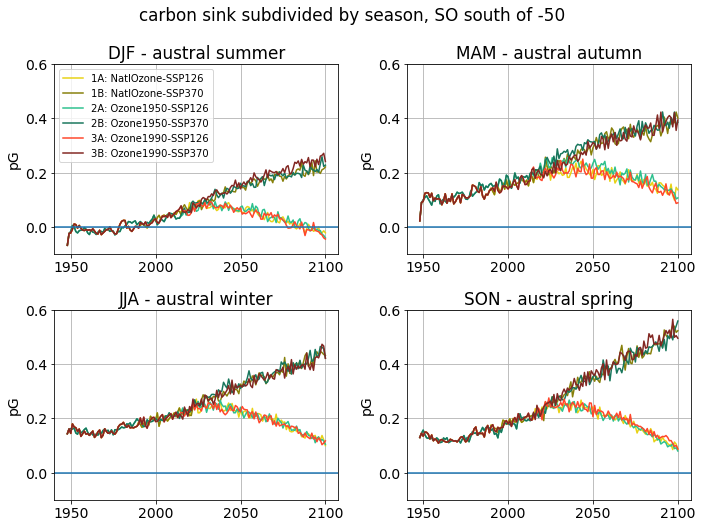

In [4]:
fact = 0.5
fig, axs = plt.subplots(2,2, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scens = ['1A','1B','2A','2B','3A','3B']

DJF_days = 31+31+28
MAM_days = 31+30+31
JJA_days = 30+31+31
SON_days = 30+31+30

sid_mol_pg = 60*60*24 * 12 * 1e-15

for s in scens:
    w = xr.open_dataset(f'./EXTRACT/ncs/TOM12_TJ_{s}SA_seasonal_cflx_total_SO.nc')
    axs[0].plot(w['yr'],w['Cflx_seasonally'][0,:]*sid_mol_pg*DJF_days, \
                color = sc.scen[s]['color'], label = sc.scen[s]['name2'])
    axs[1].plot(w['yr'],w['Cflx_seasonally'][1,:]*sid_mol_pg*MAM_days, \
                 color = sc.scen[s]['color'])
    axs[2].plot(w['yr'],w['Cflx_seasonally'][2,:]*sid_mol_pg*JJA_days, \
                color = sc.scen[s]['color'])
    axs[3].plot(w['yr'],w['Cflx_seasonally'][3,:]*sid_mol_pg*SON_days,\
                color = sc.scen[s]['color'])


tits = ['DJF - austral summer','MAM - austral autumn','JJA - austral winter','SON - austral spring']

for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[i].set_ylim([-0.1,0.6])
    axs[i].grid()
    axs[i].axhline(y=0)
    axs[i].set_ylabel('pG')
    axs[0].legend(loc = 'best', fontsize = '10')

plt.suptitle('carbon sink subdivided by season, SO south of -50')
plt.tight_layout()

## looking at decadal averages...

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.2, 1.7)

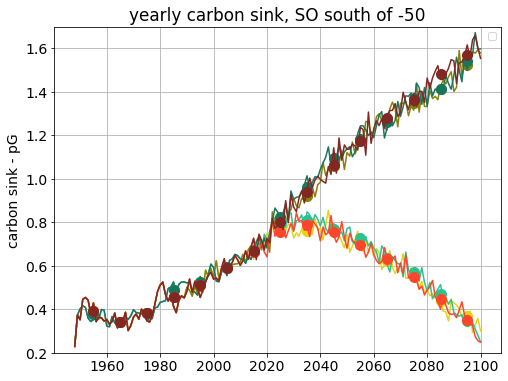

In [5]:
td = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'

               
# plt.plot(w['yrs'],w['cflx_so'])
# plt.plot(1955,
         
         
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')

scens = ['1A','1B','2A','2B','3A','3B']

DJF_days = 31+31+28
MAM_days = 31+30+31
JJA_days = 30+31+31
SON_days = 30+31+30

sid_mol_pg = 60*60*24 * 12 * 1e-15

for s in scens:
    w = xr.open_dataset(f'{td}/SUMMARY_cflx_TOM12_TJ_{s}SA_1948-2100.nc')
    axs.plot(w['yrs'],w['cflx_so'], color = sc.scen[s]['color'])
    
    cflx_so = w['cflx_so']
    
    yrs =  w['yrs'].values
    for yr in range(1950,2100,10):
        axs.plot(yr+5,np.nanmean(cflx_so[np.where((yrs < yr+10) & (yrs >= yr))]),\
                marker = 'o', color = sc.scen[s]['color'], markersize = 10)
axs.grid()
axs.axhline(y=0)
axs.legend(loc = 'best', fontsize = '10')
axs.set_ylabel('carbon sink - pG')
axs.set_title('yearly carbon sink, SO south of -50')
axs.set_ylim(0.2,1.7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.2, 1.7)

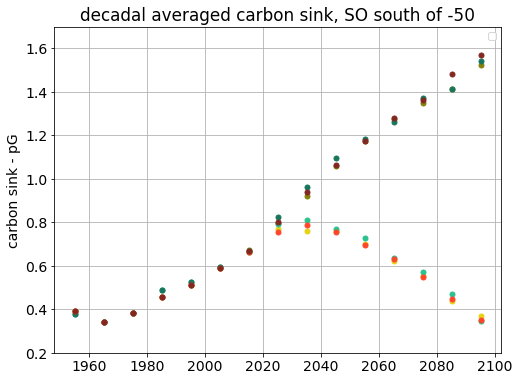

In [6]:
td = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'

               
# plt.plot(w['yrs'],w['cflx_so'])
# plt.plot(1955,
         
         
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')

scens = ['1A','1B','2A','2B','3A','3B']

DJF_days = 31+31+28
MAM_days = 31+30+31
JJA_days = 30+31+31
SON_days = 30+31+30

sid_mol_pg = 60*60*24 * 12 * 1e-15

for s in scens:
    w = xr.open_dataset(f'{td}/SUMMARY_cflx_TOM12_TJ_{s}SA_1948-2100.nc')
#     axs.plot(w['yrs'],w['cflx_so'], color = sc.scen[s]['color'])
    
    cflx_so = w['cflx_so']
    for yr in range(1950,2100,10):
        axs.plot(yr+5,np.nanmean(cflx_so[np.where((yrs < yr+10) & (yrs >= yr))]),\
                marker = 'o', color = sc.scen[s]['color'], markersize = 5)
axs.grid()
axs.axhline(y=0)
axs.legend(loc = 'best', fontsize = '10')
axs.set_ylabel('carbon sink - pG')
axs.set_title('decadal averaged carbon sink, SO south of -50')
axs.set_ylim(0.2,1.7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'decadal averaged carbon sink, SSP1-2.6, SO south of -50')

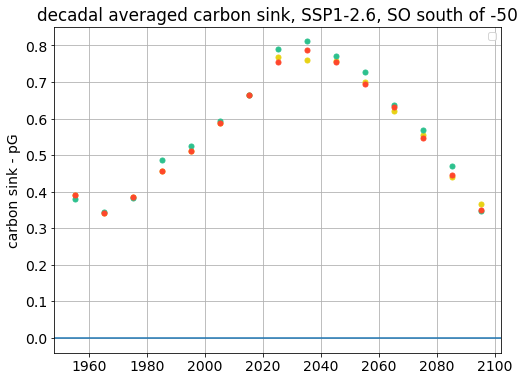

In [7]:
td = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'

               
# plt.plot(w['yrs'],w['cflx_so'])
# plt.plot(1955,
         
         
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')

scens = ['1A','2A','3A']

DJF_days = 31+31+28
MAM_days = 31+30+31
JJA_days = 30+31+31
SON_days = 30+31+30

sid_mol_pg = 60*60*24 * 12 * 1e-15

for s in scens:
    w = xr.open_dataset(f'{td}/SUMMARY_cflx_TOM12_TJ_{s}SA_1948-2100.nc')
#     axs.plot(w['yrs'],w['cflx_so'], color = sc.scen[s]['color'])
    
    cflx_so = w['cflx_so']
    for yr in range(1950,2100,10):
        axs.plot(yr+5,np.nanmean(cflx_so[np.where((yrs < yr+10) & (yrs >= yr))]),\
                marker = 'o', color = sc.scen[s]['color'], markersize = 5)
axs.grid()
axs.axhline(y=0)
axs.legend(loc = 'best', fontsize = '10')
axs.set_ylabel('carbon sink - pG')
axs.set_title('decadal averaged carbon sink, SSP1-2.6, SO south of -50')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'decadal averaged carbon sink, SSP1-2.6, SO south of -50')

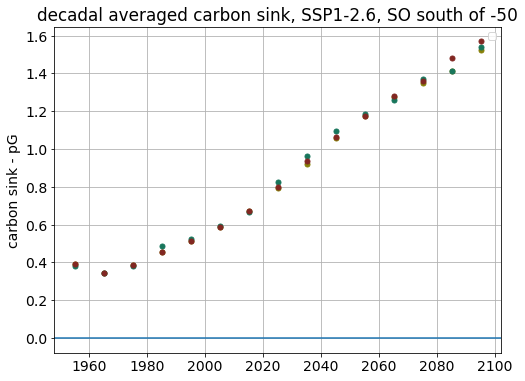

In [8]:
td = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'

               
# plt.plot(w['yrs'],w['cflx_so'])
# plt.plot(1955,
         
         
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')

scens = ['1B','2B','3B']

DJF_days = 31+31+28
MAM_days = 31+30+31
JJA_days = 30+31+31
SON_days = 30+31+30

sid_mol_pg = 60*60*24 * 12 * 1e-15

for s in scens:
    w = xr.open_dataset(f'{td}/SUMMARY_cflx_TOM12_TJ_{s}SA_1948-2100.nc')
#     axs.plot(w['yrs'],w['cflx_so'], color = sc.scen[s]['color'])
    
    cflx_so = w['cflx_so']
    for yr in range(1950,2100,10):
        axs.plot(yr+5,np.nanmean(cflx_so[np.where((yrs < yr+10) & (yrs >= yr))]),\
                marker = 'o', color = sc.scen[s]['color'], markersize = 5)
axs.grid()
axs.axhline(y=0)
axs.legend(loc = 'best', fontsize = '10')
axs.set_ylabel('carbon sink - pG')
axs.set_title('decadal averaged carbon sink, SSP1-2.6, SO south of -50')


In [9]:
print('compcomp')

compcomp
